Hardware Implementation of a Low Pass FIR Filter found in SDSoC Design Examples Ported to python here:
https://github.com/hackwa/pynq

In [1]:
!sudo -H pip install --upgrade 'git+https://github.com/hackwa/Pynq@master#egg=fir'

  Cloning https://github.com/hackwa/Pynq (to master) to /tmp/pip-build-h1365142/fir
  Found existing installation: fir 0.1
    Uninstalling fir-0.1:
      Successfully uninstalled fir-0.1
  Running setup.py install for fir ... - \ | / - \ | / - \ | done
You are using pip version 8.1.1, however version 8.1.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [12]:
from fir import fir
import numpy as np
import timeit

myDesign = fir()

# Generate "Noisy" data
T = 5.0         # seconds
fs = 30.0
n = int(T * fs) # total number of samples
t = np.linspace(0, T, n, endpoint=False)
samples = np.sin(1.2*2*np.pi*t) + 1.5*np.cos(9*2*np.pi*t) + 0.5*np.sin(12.0*2*np.pi*t)

# Initialize hardware and download bitstream
myDesign.initHw()

# Filter the data here
myDesign.getResponse(list(samples))
print(myDesign.response)

[396, 290, -195, 437, 298, -173, -326, -754, -1676, -2546, -2530, -3188, -3682, -3048, -2776, -3029, -2314, -1784, -1479, -905, 221, 983, 1434, 2938, 3451, 3332, 3643, 3393, 2565, 1711, 1601, 562, -262, -419, -1665, -2767, -3375, -3870, -2988, -482, 5298, 14314, 25984, 41477, 58378, 74357, 88979, 99002, 102715, 99760, 90964, 75998, 56682, 36149, 13849, -8859, -30775, -52072, -72281, -89670, -101725, -108119, -106418, -94908, -75616, -50559, -21067, 8491, 35179, 57537, 75002, 86754, 93469, 97103, 95753, 89422, 78584, 61879, 39607, 13604, -13218, -39943, -62991, -80147, -92247, -98874, -99848, -96116, -89156, -77696, -60195, -37896, -11765, 18689, 49469, 75570, 96987, 110038, 112144, 105253, 92644, 73833, 52274, 31694, 10738, -10738, -31694, -52274, -73833, -92644, -105253, -112144, -110038, -96987, -75570, -49469, -18689, 11765, 37896, 60195, 77696, 89156, 96116, 99848, 98874, 92247, 80543, 63677, 40434, 13354, -13354, -40434, -63677, -80543, -92247, -98874, -99848, -96116, -89156, -776

<IPython.core.display.Javascript object>


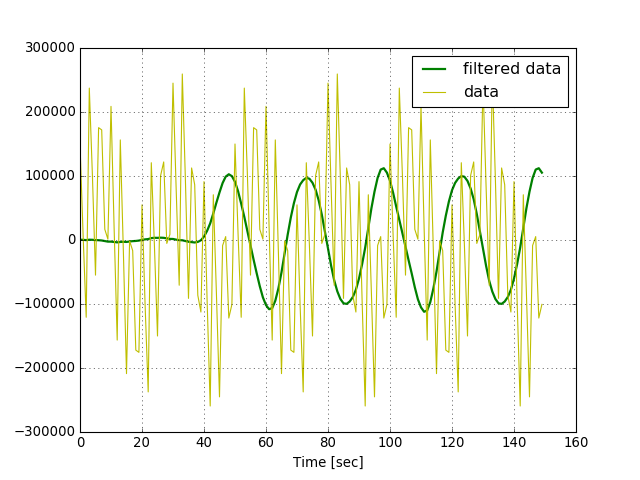

In [13]:
%matplotlib notebook
import matplotlib.pyplot as plt

plt.subplot(1, 1, 1)
plt.xlabel('Time [sec]')
plt.grid()
plt.plot(myDesign.response,'g-',linewidth=2,label='filtered data')
plt.plot(samples*100000,'y-',label='data')
plt.legend()

<IPython.core.display.Javascript object>


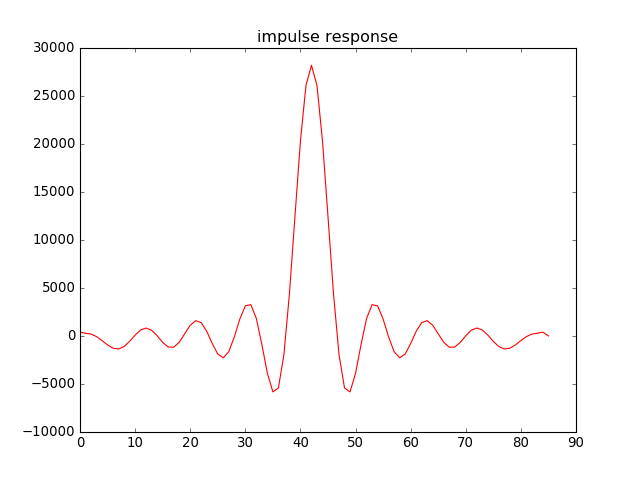

In [14]:
%matplotlib notebook
import matplotlib.pyplot as plt

plt.plot(myDesign.impulseResponse(),'r')
plt.title('impulse response')

Software Implementation of filter found at:
http://stackoverflow.com/questions/25191620/creating-lowpass-filter-in-scipy-understanding-methods-and-units
(Benchmarks and Outputs using the same data as that used by hardware design)
Total input samples= 150

In [15]:
%matplotlib notebook
import numpy as np
from scipy.signal import butter, lfilter, freqz
import matplotlib.pyplot as plt


def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a
def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

# Filter requirements.
order = 6
fs = 30.0       # sample rate, Hz
cutoff = 3.667  # desired cutoff frequency of the filter, Hz
# Get the filter coefficients so we can check its frequency response.
b, a = butter_lowpass(cutoff, fs, order)

number =1000
def hwresp():
    myDesign.getResponse()

def swresp():
    butter_lowpass_filter(([0]), cutoff, fs, order)

import timeit
print("Time taken by hardware to run", number,"times",timeit.timeit(hwresp,number=number))
print("Time taken by software to run", number,"times",timeit.timeit(swresp,number=number))

Time taken by hardware to run 1000 times 2.2446242500000153
Time taken by software to run 1000 times 4.325770511999963


<IPython.core.display.Javascript object>


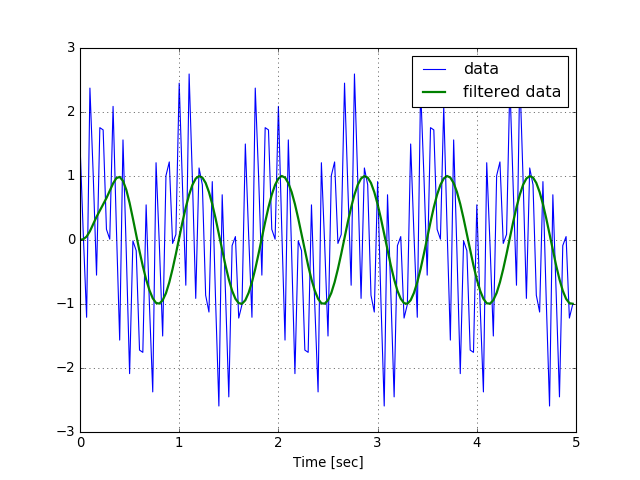

In [16]:
# Demonstrate the use of the filter.
# First make some data to be filtered.
T = 5.0         # seconds
n = int(T * fs) # total number of samples
t = np.linspace(0, T, n, endpoint=False)
# "Noisy" data.  We want to recover the 1.2 Hz signal from this.
data = np.sin(1.2*2*np.pi*t) + 1.5*np.cos(9*2*np.pi*t) + 0.5*np.sin(12.0*2*np.pi*t)

# Filter the data, and plot both the original and filtered signals.
y = butter_lowpass_filter(data, cutoff, fs, order)

plt.subplot(1, 1, 1)
plt.plot(t, data, 'b-', label='data')
plt.plot(t, y, 'g-', linewidth=2, label='filtered data')
plt.xlabel('Time [sec]')
plt.grid()
plt.legend()
plt.subplots_adjust(hspace=0.35)

In [17]:
help(myDesign)
# Fancy Input
#x = np.linspace(0,60,600)
#samples =   np.sin(300* x) + 2 * np.sin(x) + np.sin(x/2) + 2* np.sin(x/3)+ np.sin(x/4) + np.sin(x/5) +  np.sin(x/7)

Help on fir in module fir.fir object:

class fir(builtins.object)
 |  Class which controls fir filter hardware
 |  
 |  Attributes
 |  ----------
 |  bitfile : str
 |      Absolute path of bitstream file
 |  libfile : str
 |      Absolute path of shared library
 |  response: list
 |      Filter output
 |  nshift_reg : int
 |      Number of shift regs on hardware
 |  overlay : Overlay
 |      Gives access to bitstream overlay
 |  
 |  Methods defined here:
 |  
 |  __init__(self)
 |  
 |  getResponse(self, datain=[0])
 |      Send input to hardware and get response
 |      
 |      This method takes samples of data and then processes
 |      them on hardware. At the end, it resets the FIR Shift
 |      Registers.
 |      
 |      Parameters
 |      ----------
 |      datain : list
 |          A list containing input samples
 |      
 |      Returns
 |      -------
 |      None
 |          Use response attribute to read output.
 |  
 |  impulseResponse(self)
 |      Get impulse Response 